In [1]:
library(tidyverse)
library(cowplot)
library(ggpubr)
library(arrow)
library(yardstick)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘ggpubr’


The following object is masked from ‘pa

In [2]:
pheno_df <- read_parquet("data/fits/phenotype_fits.parquet")

gwas_df <- read_parquet("data/fits/gwas_summary.parquet") |>
    rename(r2_gwas = r2)

merged_df <- pheno_df |>
    inner_join(gwas_df, by = c("k", "phenotype" = "projection"))

merged_df |>
    head(2)

anon,k,phenotype,r2_anon,r2_orig,operator,r2_gwas
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
anon_005,5,and_q_4123_0_q_4249_5,0.7579692,0.6568344,and,0.6109110
anon_005,5,and_q_5074_6_q_4247_10,0.8994220,0.8271367,and,0.7309629


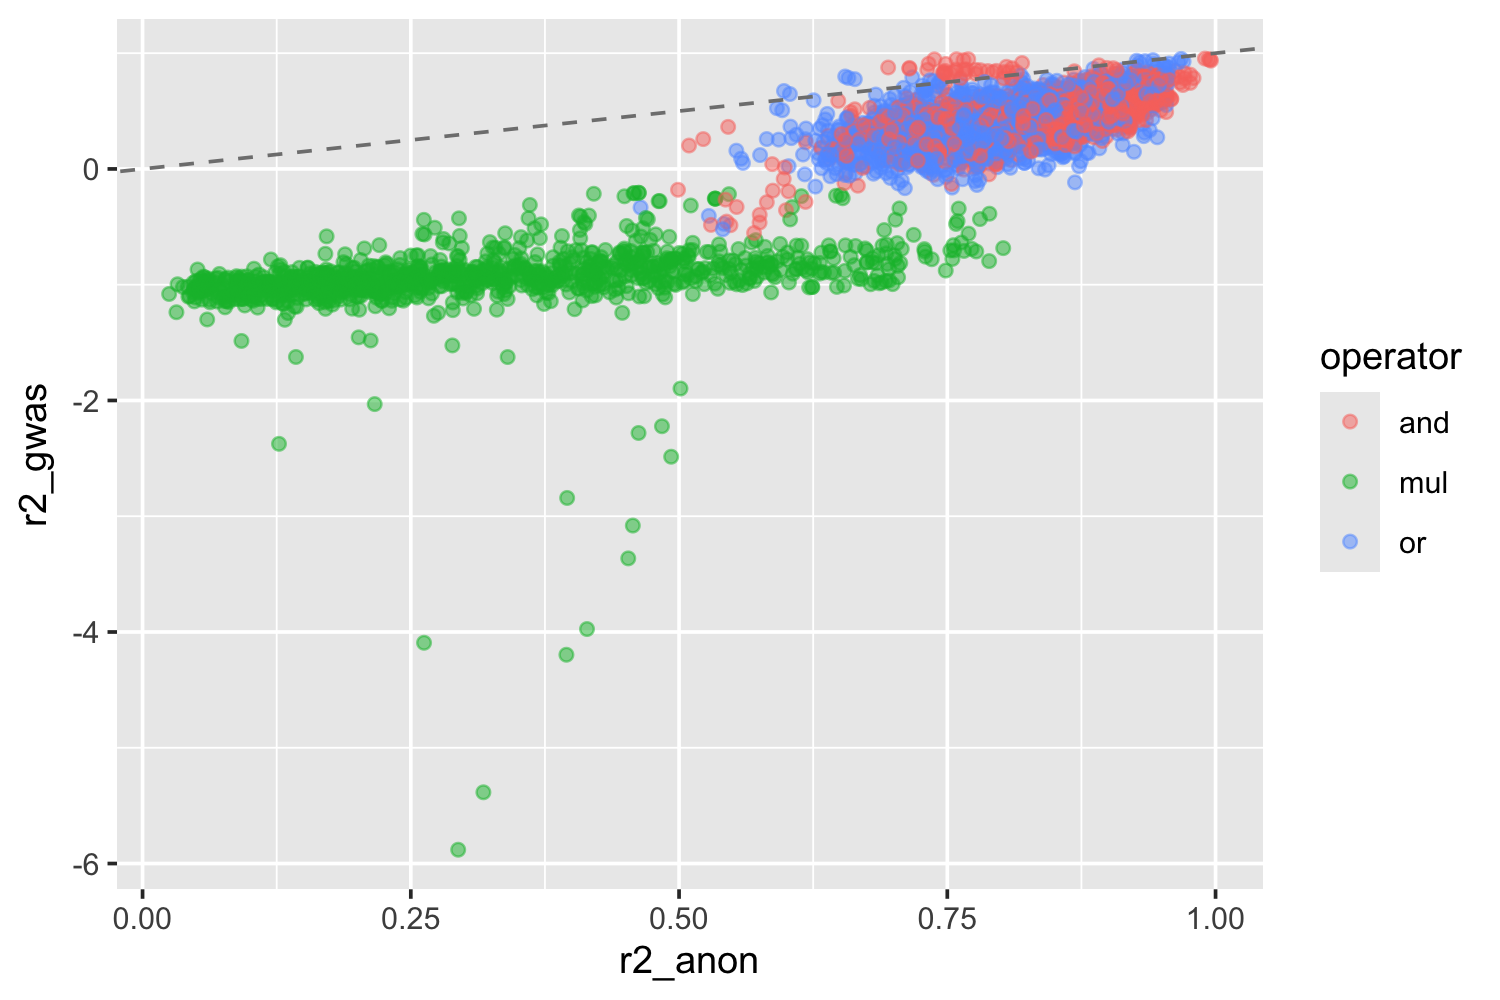

In [3]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 250)

merged_df |>
    ggplot(aes(x = r2_anon, y = r2_gwas, color = operator)) +
    geom_point(alpha = 0.5) +
    geom_abline(slope = 1, intercept = 0, color = "gray50", linetype = "dashed") +
    facet_wrap(vars(k))

In [2]:
b_orig <- read_tsv("data/indirect-betas/beta_original.tsv", show_col_types = FALSE)
b_anon <- read_tsv("data/indirect-betas/beta_005.tsv", show_col_types = FALSE)

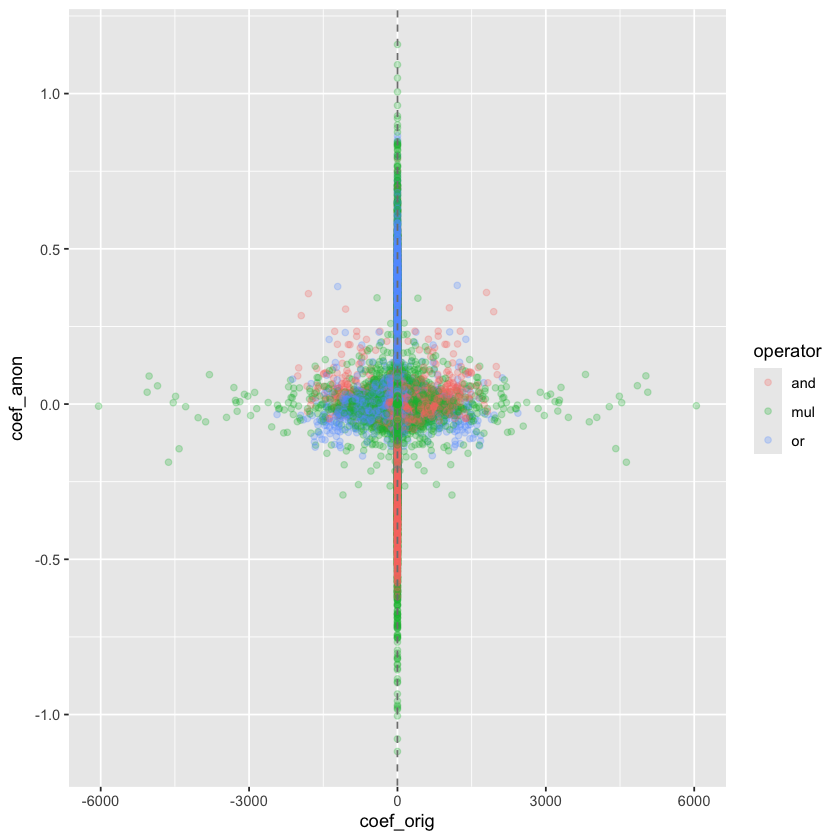

In [9]:
plot_df <- b_orig |>
    pivot_longer(-feature, names_to = "projection", values_to = "coef") |>
    inner_join(
        b_anon |> pivot_longer(-feature, names_to = "projection", values_to = "coef"),
        by = c("feature", "projection"), suffix = c("_orig", "_anon")
    ) |>
    mutate(operator = str_extract(projection, "^([a-z]+)(?=_)"))

plot_df |>
    ggplot(aes(x = coef_orig, y = coef_anon, color = operator)) +
    geom_point(alpha = 0.25) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray50")